In [2]:
import numpy as np
import random
import time
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from IPython import display

from iam_dataset import IAMDataset

# IAMDataset
Here we are testing the IAMDataset. The IAMDataset provides images of handwritten passages written by multiple individuals. The data is available at http://www.fki.inf.unibe.ch.

The passages can be parsed into separate words, lines, or the whole form. The dataset should be separated into writer independent training and testing sets.

### Notes:
* Please enter your credentials for the IAM dataset (obtain the username and password from http://www.fki.inf.unibe.ch/DBs/iamDB/iLogin/index.php) in credentials.json. An example is provided in credentials.json.example


## Functions and parameters

In [5]:
n_images = 25
def plot_image_with_text(ds):
    fig, ax = plt.subplots(1)
    for i in range(n_images):
        n = int(random.random()*len(ds))
        image_i, text_i = ds[n]
        plt.imshow(image_i, cmap='Greys_r')        
        plt.title(text_i[0])
        display.display(plt.gcf())
        display.clear_output(wait=True)
        time.sleep(1)
        
def plot_image_with_bb(ds):
    fig, ax = plt.subplots(1, figsize=(18, 16))

    for i in range(n_images):
        if i > 0:
            for rect in rects: rect.remove()

        n = int(random.random()*len(ds))
        image_i, bb_i = ds[n]
        
        h, w = image_i.shape[0], image_i.shape[1]
        
        plt.imshow(image_i, cmap='Greys_r')
        rects = []
        for j in range(bb_i.shape[0]):
            bb_ij = bb_i[j]
            bb_ij_pixels = [int(bb_ij[0]*w), int(bb_ij[1]*h), int(bb_ij[2]*w), ]
            rect = patches.Rectangle((bb_ij[0]*w, bb_ij[1]*h), bb_ij[2]*w, bb_ij[3]*h, 
                                     fill=False, color="r")
            rects.append(rect)
            ax.add_patch(rect)

        display.display(plt.gcf())
        display.clear_output(wait=True)

        time.sleep(1)

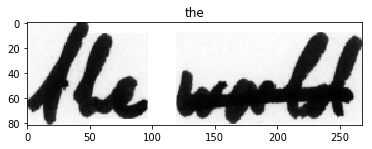

In [4]:
ds = IAMDataset("word", output_data="text")
plot_image_with_text(ds)

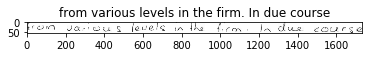

In [5]:
ds = IAMDataset("line", output_data="text")
plot_image_with_text(ds)

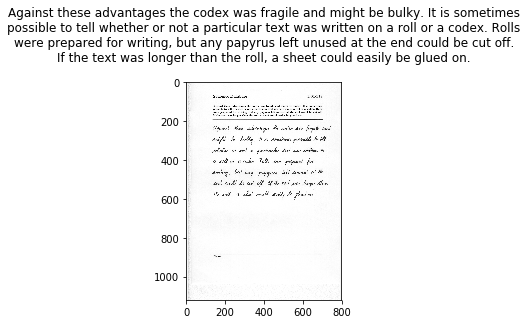

In [12]:
ds = IAMDataset("form", output_data="text")
plot_image_with_text(ds)

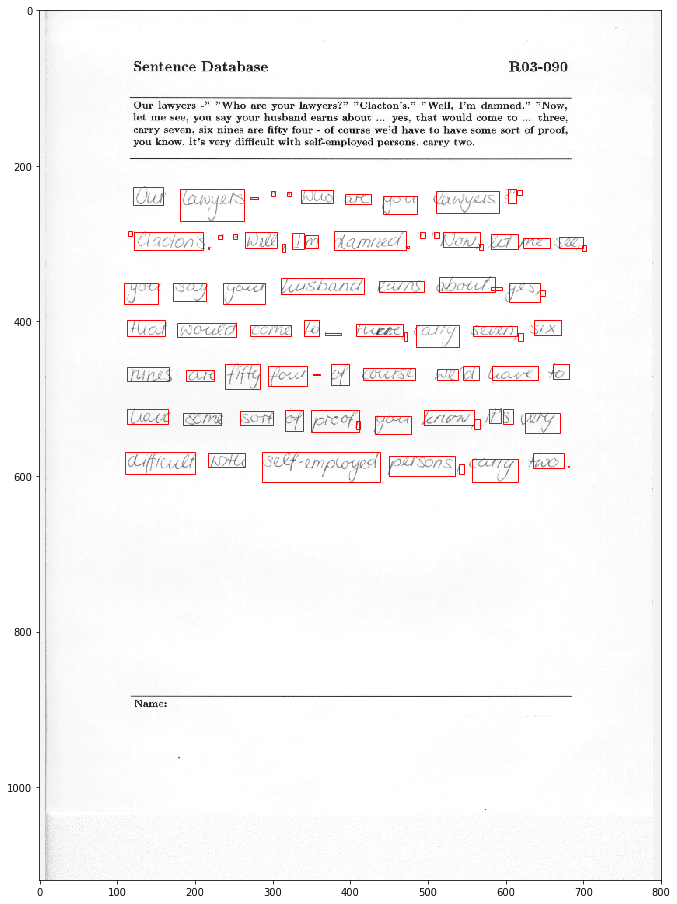

In [5]:
ds = IAMDataset("form", output_data="bb", output_parse_method="word")
plot_image_with_bb(ds)

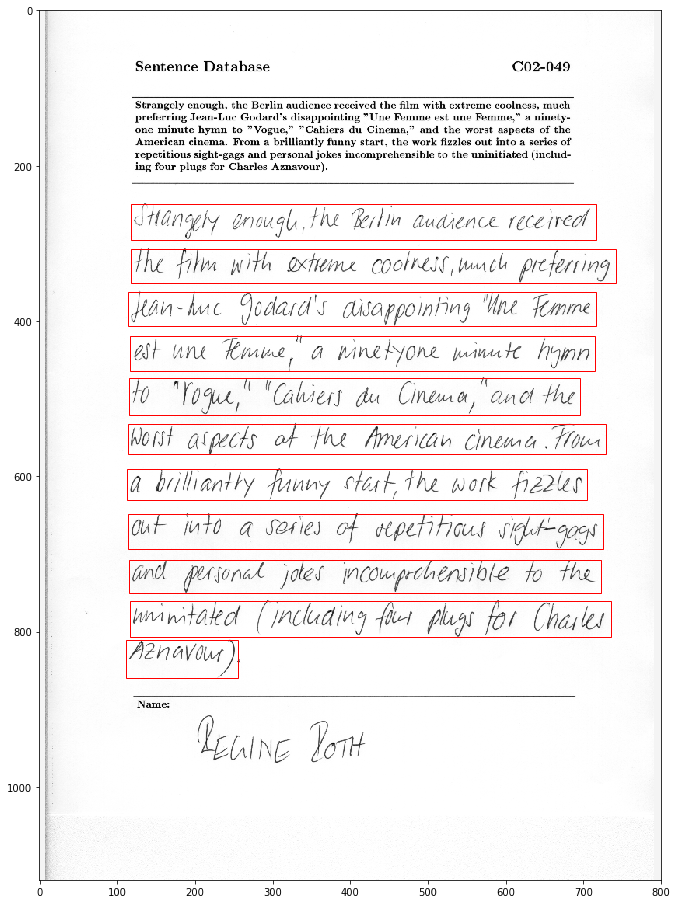

In [6]:
ds = IAMDataset("form", output_data="bb", output_parse_method="line")
plot_image_with_bb(ds)

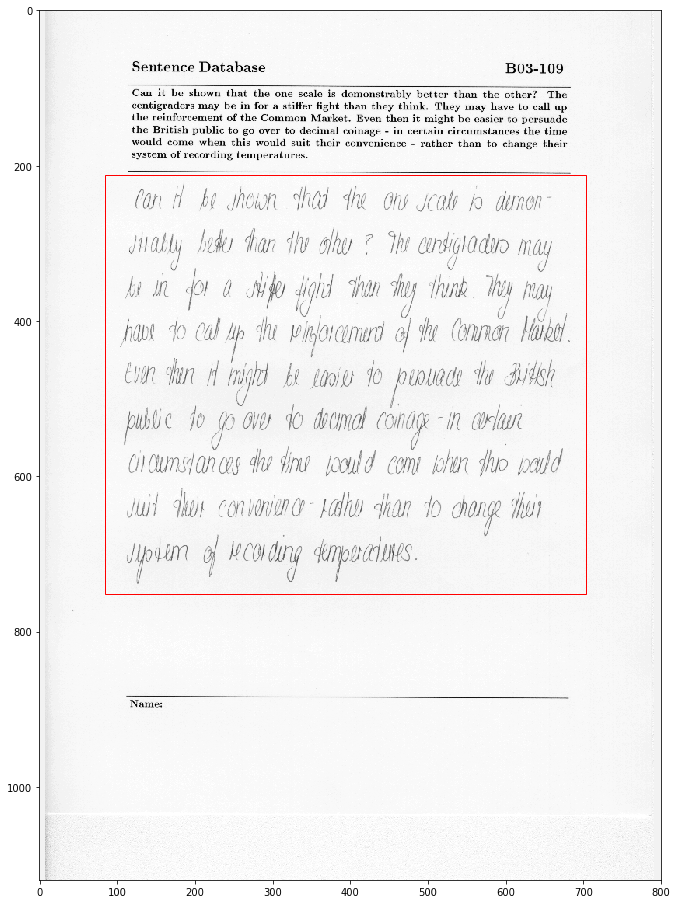

In [ ]:
ds = IAMDataset("form", output_data="bb", output_parse_method="form")
plot_image_with_bb(ds)